Notebook for East Pacific-West Pacific comparisons and overturning circulation plots. Makes Figures 3, 4, 5, 7, 8, 11

In [1]:
import numpy as np
import matplotlib.pylab as plt
import scipy.io as si
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

## Compare control simulation with ERA-Interim data

### Compare vertical profiles in East/West Pacific

In [2]:
#Load data:
#These are 2D (x-z) profiles taken from the last 100 days of the simulations
w = np.load("data/3D_channel_control_W.dat")
t = np.load("data/3D_channel_control_temp.dat")
relh = np.load("data/3D_channel_control_relh.dat") 
#Note that the relative humidity is calculated over liquid water for T >= 0C and over ice for T < 0C
qv = np.load("data/3D_channel_control_qv.dat")
rho = np.load("data/3D_channel_control_rho.dat")
press = np.load("data/3D_channel_control_press.dat")
z = np.load("data/290_z.dat") #Same vertical grid


In [3]:
#Get various boundaries for East and West Pacific: 
d1, d2 = np.shape( w )
x = np.linspace(0, float(d2) * 3. / 1000., d2)

#WP = x = 1-3, EP = 10-12
j1 = 0
j2 = 0
j3 = 0
j4 = 0
#WP = x = 2-4 or 4 -6
j5 = 0
j6 = 0
j7 = 0
for i in range( d2):
    if x[i] >= 1. and j1 == 0.:
        j1 = i
    if x[i] >= 3. and j2 == 0.:
        j2 = i
    if x[i] >= 2. and j5 == 0.:
        j5 = i
    if x[i] >= 4. and j6 == 0.:
        j6 = i
    if x[i] >= 6. and j7 == 0.:
        j7 = i
    if x[i] >= 10. and j3 == 0.:
        j3 = i
    if x[i] >= 12.:
        j4 = i
        break

#useful constants
cp = 1005.
Lv = 2.5 * 10. ** 6

In [4]:
#Load ERA-Interim data
#WP is defined as 140-160E and 5S-5N, EP as 240-260E and 5S-5N

mp = np.load("ERA/ERA_press.dat") / 100.

EP_t = np.load( "ERA/ERA_Int_EPac_T.dat")
EP_w = np.load( "ERA/ERA_Int_EPac_W.dat")
EP_qv = np.load( "ERA/ERA_Int_EPac_QV.dat")
EP_rh = np.load( "ERA/ERA_Int_EPac_RH.dat")
EP_z = np.load( "ERA/ERA_Int_EPac_Z.dat")

WP_t = np.load( "ERA/ERA_Int_WPac_T.dat")
WP_w = np.load( "ERA/ERA_Int_WPac_W.dat")
WP_qv = np.load( "ERA/ERA_Int_WPac_QV.dat")
WP_rh = np.load( "ERA/ERA_Int_WPac_RH.dat")
WP_z = np.load( "ERA/ERA_Int_WPac_Z.dat")

In [5]:
#Some functions for making figures
def make_axis( a):
    majorLocator = MultipleLocator( 200 )
    majorFormatter = FormatStrFormatter('%d')
    minorLocator = MultipleLocator( 100 )

    a.yaxis.set_major_locator(majorLocator)
    a.yaxis.set_major_formatter(majorFormatter)
    a.yaxis.set_minor_locator(minorLocator)
    
    plt.yticks(fontsize = 12)
    plt.ylabel("Pressure [hPa]", fontsize = 14)
    
    plt.ylim([1000., 25.])
    
    a.spines['right'].set_visible(False)
    a.spines['top'].set_visible(False)
    
    for axis in ['top','bottom','left','right']:
        a.spines[axis].set_linewidth(2)
    a.tick_params(which='minor', width=4)
    a.tick_params(which='major', length= 5)
    a.tick_params(which='both', width=2)

    return 0

def xticks(a, major, minor, label, xl1, xl2):
    majorLocator = MultipleLocator( major )
    majorFormatter = FormatStrFormatter('%d')
    minorLocator = MultipleLocator( minor )

    a.xaxis.set_major_locator(majorLocator)
    a.xaxis.set_major_formatter(majorFormatter)
    a.xaxis.set_minor_locator(minorLocator)
    
    plt.xticks(fontsize = 12)
    plt.xlabel(label, fontsize = 14) 
    
    plt.xlim([xl1, xl2])
    
    return 0

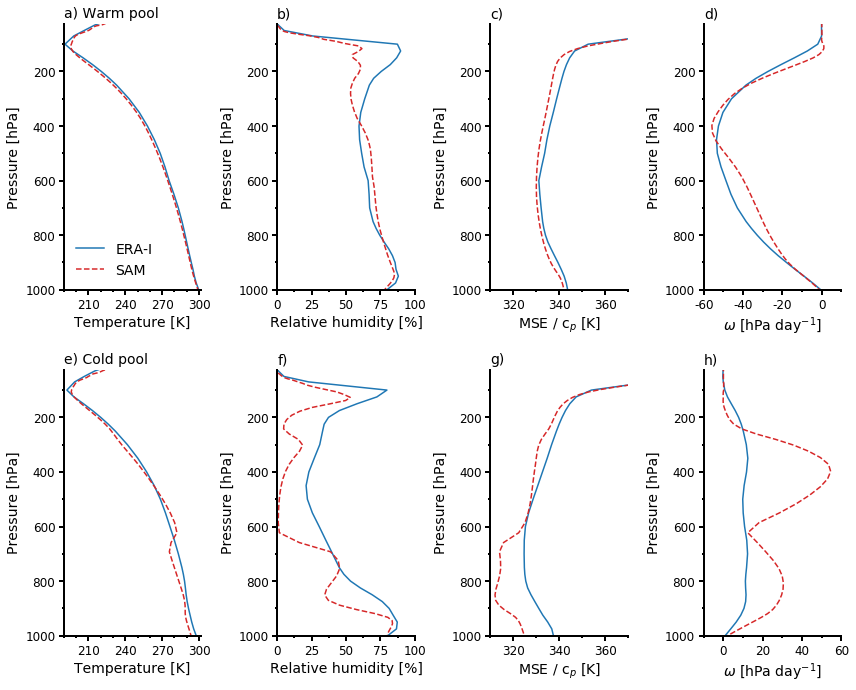

In [6]:
cs = [(31 / 255., 119 / 255., 180 / 255.), (44. / 255., 160 / 255., 44 / 255.), (214 / 255., 39 / 255., 40 / 255.), (255 / 255., 127 / 255., 14 / 255.) ]

fig = plt.figure( figsize = (12, 10) )
plt.subplots_adjust(left = 0.08, right = 0.98, bottom = 0.1, top = 0.95, hspace = 0.3, wspace = 0.55)

ax = plt.subplot(2, 4, 1)
plt.title("a) Warm pool", loc = 'left', fontsize = 14)

plt.plot( WP_t, mp, color = cs[0])
plt.plot( np.mean(t[:, j1:j2], axis = 1), press, '--', color = cs[2])

plt.legend(["ERA-I", "SAM"], frameon= False, fontsize = 14, loc = "lower left")

xticks(ax, 30., 10., "Temperature [K]", 190., 302.)
make_axis( ax )

plt.yticks(fontsize = 12)
plt.ylabel("Pressure [hPa]", fontsize = 14)
    
ax = plt.subplot(2, 4, 5)
plt.title("e) Cold pool", loc = 'left', fontsize = 14)

plt.plot( EP_t, mp, color = cs[0])
plt.plot( np.mean(t[:, j3:j4], axis = 1), press, '--', color = cs[2])

xticks(ax, 30., 10., "Temperature [K]", 190., 302.)
make_axis( ax )

ax = plt.subplot(2, 4, 2)
plt.title("b)", loc = 'left', fontsize = 14)

plt.plot( WP_rh , mp, color = cs[0])
plt.plot( np.mean(relh[:, j1:j2] * 100., axis = 1), press, '--', color = cs[2])

xticks(ax, 25., 12.5, "Relative humidity [%]", 0., 100.)
make_axis( ax )

ax = plt.subplot(2, 4, 6)
plt.title("f)", loc = 'left', fontsize = 14)

plt.plot( EP_rh , mp, color = cs[0])

plt.plot( np.mean(relh[:, j3:j4] * 100., axis = 1), press, '--', color = cs[2])

xticks(ax, 25., 12.5, "Relative humidity [%]", 0., 100.)
make_axis( ax )

ax = plt.subplot(2, 4, 3)
plt.title("c)", loc = 'left', fontsize = 14)

mse = qv * Lv + cp * t + 9.8 * z[:, np.newaxis]
WP_mse = WP_qv * Lv * 100. + cp * WP_t + 9.8 * WP_z

plt.plot( WP_mse / 1005., mp, color = cs[0])
plt.plot( np.mean(mse[:, j1:j2], axis = 1) / 1005., press, '--', color = cs[2])

xticks(ax, 20., 10, "MSE / c$_p$ [K]", 310., 370.)

make_axis( ax )


ax = plt.subplot(2, 4, 7)
plt.title("g)", loc = 'left', fontsize = 14)

EP_mse = EP_qv * Lv * 100. + cp * EP_t + 9.8 * EP_z

plt.plot( EP_mse / 1005., mp, color = cs[0])
plt.plot( np.mean(mse[:, j3:j4] / 1005., axis = 1) , press, '--', color = cs[2])

xticks(ax, 20., 10, "MSE / c$_p$ [K]", 310., 370.)

make_axis( ax )


ax = plt.subplot(2, 4, 4)
plt.title("d)", loc = 'left', fontsize = 14)

plt.plot( WP_w / 100. * 86400., mp, color = cs[0])
plt.plot( np.mean(w[:, j1:j2], axis = 1) * -9.8 * rho / 100. * 86400., press, '--', color = cs[2])


xticks(ax, 20., 10, "$\omega$ [hPa day$^{-1}$]", -60., 10.)
make_axis( ax )

ax = plt.subplot(2, 4, 8)
plt.title("h)", loc = 'left', fontsize = 14)

plt.plot( EP_w / 100. * 86400., mp, color = cs[0])
plt.plot( np.mean(w[:, j3:j4], axis = 1) * -9.8 * rho / 100. * 86400., press, '--', color = cs[2])

xticks(ax, 20., 10, "$\omega$ [hPa day$^{-1}$]", -10., 60.)
make_axis( ax )

plt.savefig("EP_WP_comp.png")
plt.savefig("EP_WP_comp.pdf")

plt.show()

### Now compare overturning circulations

In [7]:
#Function for calculating streamfunction
def streamfunction( u, p ):

    d1, d2 = np.shape( u )
    s = np.zeros( ( d1, d2 ) )

    for i in range( 1, d1 ):
        s[ i, :] += np.trapz( u[:i, :], p[:i], axis = 0 )

    return s / 9.8

In [8]:
#Load climatological ERA interim data
u = np.load("ERA/ERA_mean_total_U.dat")
v = np.load("ERA/ERA_mean_total_V.dat")
lons = np.load("ERA/ERA_lons.dat")
lats = np.load("ERA/ERA_lats.dat")
d1, d2, d3 = np.shape( u )

In [9]:
#Use python's spharm package to calculate non-divergent winds
import spharm
gridtype = 'regular'
rsphere = 6.37122e6
sp = spharm.Spharmt(d3,d2,rsphere=rsphere,gridtype=gridtype)


gridtype = 'regular'
rsphere = 6.37122e6
rad_lons = lons * np.pi / 180.
nu = np.zeros( ( ( d1, d2, d3)))
ntrunc = 42
for j in range( d1 ):
    psispec, chispec =  sp.getpsichi(u[j],v[j],ntrunc) #Helmholtz decomposition
    #get non-divergent winds
    for i in range( d3):
        if i == 0:
            nu[j, :, i] = 1. / rsphere / np.cos(lats * 2. *np.pi / 360.) * (chispec[:, 1] - chispec[:, -1]) / (rad_lons[1] - rad_lons[ - 1])

        elif i == d3 - 1:
            nu[j, :, i] = 1. / rsphere / np.cos(lats * 2. *np.pi / 360.) * (chispec[:, 0] - chispec[:, d3 - 2]) / (rad_lons[0] - rad_lons[ d3 - 2])

        else:
            nu[j, :, i] = 1. / rsphere / np.cos(lats * 2. *np.pi / 360.) * (chispec[:, i + 1] - chispec[:, i -1]) / (rad_lons[i + 1] - rad_lons[ i - 1])


In [10]:
#Now do same thing for January 2006
u2 = np.load("ERA/ERA_Jan_2006_total_U.dat")
v2 = np.load("ERA/ERA_Jan_2006_total_V.dat")

gridtype = 'regular'
rsphere = 6.37122e6
rad_lons = lons * np.pi / 180.
nu2 = np.zeros( ( ( d1, d2, d3)))
ntrunc = 42
for j in range( d1 ):
    psispec, chispec =  sp.getpsichi(u2[j],v2[j],ntrunc)
    for i in range( d3):
        if i == 0:
            nu2[j, :, i] = 1. / rsphere / np.cos(lats * 2. *np.pi / 360.) * (chispec[:, 1] - chispec[:, -1]) / (rad_lons[1] - rad_lons[ - 1])

        elif i == d3 - 1:
            nu2[j, :, i] = 1. / rsphere / np.cos(lats * 2. *np.pi / 360.) * (chispec[:, 0] - chispec[:, d3 - 2]) / (rad_lons[0] - rad_lons[ d3 - 2])

        else:
            nu2[j, :, i] = 1. / rsphere / np.cos(lats * 2. *np.pi / 360.) * (chispec[:, i + 1] - chispec[:, i -1]) / (rad_lons[i + 1] - rad_lons[ i - 1])



In [11]:
#Calculate streamfunctions:
stream = streamfunction( nu[:, d2 / 2], mp * 100. )
stream2 = streamfunction( nu2[:, d2 / 2], mp * 100. )

In [12]:
#Load horizontal winds in simulation
u = np.load( "data/3D_channel_controlK_U.dat" )
#Calculate streamfunction
sstream = streamfunction( u, press * 100. )

/home/nick/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


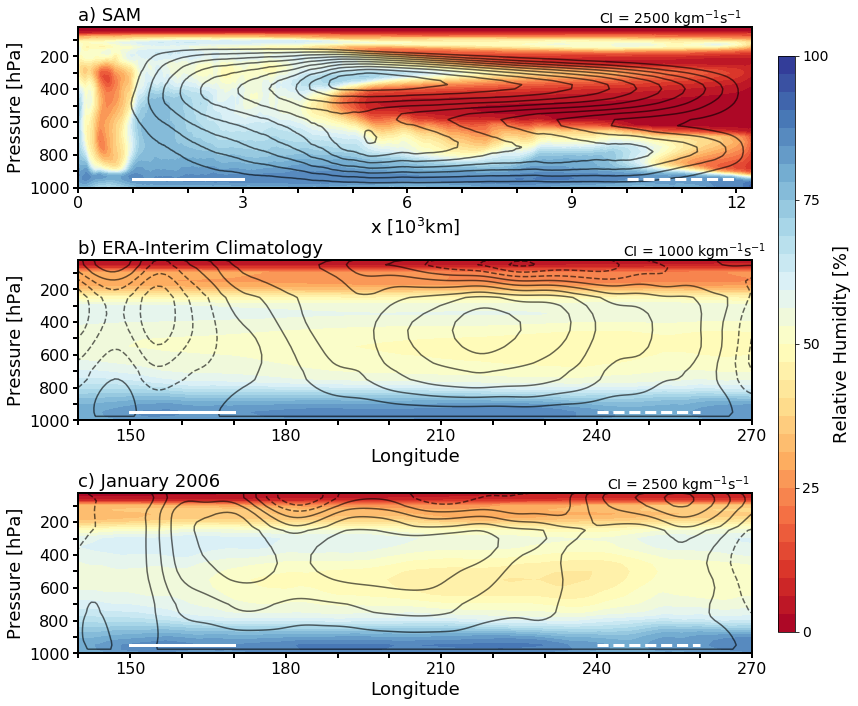

In [13]:
#Plot!
fig = plt.figure( figsize = (12, 10) )
plt.subplots_adjust(left = 0.09, right = 0.98, bottom = 0.08, top = 0.95, hspace = 0.45, wspace = 0.3)

ax = plt.subplot(3, 1, 1)
plt.title( "a) SAM", fontsize = 18, loc = "left" )

v = np.linspace( 0., 100., 33 )

d1, d2 = np.shape( relh )
y = np.linspace( 0, d2 * 3 / 1000., d2 )
plt.contourf( y, press , relh * 100., v, cmap = plt.cm.RdYlBu )

plt.ylim([1000., 20.])

#Put markers showing location of EP and WP
wp = [1., 3.]
plt.plot( wp, [950., 950.], 'w', linewidth = 3.)
ep = [10., 12.]
plt.plot( ep, [950., 950.], 'w--', linewidth = 3.)

plt.xlabel("x [10$^3$km]", fontsize = 18)
plt.ylabel("Pressure [hPa]", fontsize = 18)
a = 200
b = 2

vs = np.arange(2500., 32500, 2500 )
plt.contour( y, press, sstream, vs, colors = 'k', alpha = 0.6 )

plt.text( 9.5, 0., "CI = 2500 kgm$^{-1}$s$^{-1}$", fontsize = 14 )

ax.tick_params(axis = 'x', which = 'both', bottom="on", top = "off", labelbottom = "on", direction = "out")
ax.tick_params(axis="y", which="both", bottom="off", top="off", labelbottom="off", left="on", right="off", labelleft="on", direction = "out") 
ax.tick_params(length = 5, which = 'both')

majorLocator = MultipleLocator(200)
minorLocator = MultipleLocator(100)
ax.yaxis.set_major_locator(majorLocator)
ax.yaxis.set_minor_locator(minorLocator)
majorLocator = MultipleLocator(3)
minorLocator = MultipleLocator(1)
ax.xaxis.set_major_locator(majorLocator)
ax.xaxis.set_minor_locator(minorLocator)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
ax.tick_params(which='both', width=2)


era_rh = np.load("ERA/ERA_mean_RH.dat")
            
ax = plt.subplot(3, 1, 2)
plt.title( "b) ERA-Interim Climatology", fontsize = 18, loc = "left" )
vs = np.arange(-30000., 31000, 1000 )

v = np.linspace( 0., 100., 33 )
d1, d2, d3 = np.shape( era_rh)

cset = plt.contourf( lons, mp , np.mean(era_rh[:, :], axis = 1), v, cmap = plt.cm.RdYlBu )

plt.ylim([1000., 20.])
plt.xlim([140., 270.])

plt.xlabel("Longitude", fontsize = 18)
plt.ylabel("Pressure [hPa]", fontsize = 18)
a = 200
b = 2

#vs = np.arange(-10., 11., 1. )
plt.contour( lons, mp, stream, vs, colors = 'k', alpha = 0.6)
plt.text( 245., 0., "CI = 1000 kgm$^{-1}$s$^{-1}$", fontsize = 14 )

ax.tick_params(axis = 'x', which = 'both', bottom="on", top = "off", labelbottom = "on", direction = "out")
ax.tick_params(axis="y", which="both", bottom="off", top="off", labelbottom="off", left="on", right="off", labelleft="on", direction = "out") 
ax.tick_params(length = 5, which = 'both')

majorLocator = MultipleLocator(200)
minorLocator = MultipleLocator(100)
ax.yaxis.set_major_locator(majorLocator)
ax.yaxis.set_minor_locator(minorLocator)
majorLocator = MultipleLocator(30)
minorLocator = MultipleLocator(10)
ax.xaxis.set_major_locator(majorLocator)
ax.xaxis.set_minor_locator(minorLocator)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

wp = [150., 170.]
plt.plot( wp, [950., 950.], 'w', linewidth = 3.)
cp = [240., 260.]
plt.plot( cp, [950., 950.], 'w--', linewidth = 3.)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
ax.tick_params(which='both', width=2)



era_rh = np.load("ERA/ERA_Jan_2006_RH.dat")
            
ax = plt.subplot(3, 1, 3)
plt.title( "c) January 2006", fontsize = 18, loc = "left" )

v = np.linspace( 0., 100., 33 )
d1, d2, d3 = np.shape( era_rh)

cset = plt.contourf( lons, mp , np.mean(era_rh[:, :], axis = 1), v, cmap = plt.cm.RdYlBu )

plt.ylim([1000., 20.])
plt.xlim([140., 270.])

plt.xlabel("Longitude", fontsize = 18)
plt.ylabel("Pressure [hPa]", fontsize = 18)
a = 200
b = 2

vs = np.arange(-50000., 52500, 2500 )
plt.contour( lons, mp, stream2, vs, colors = 'k', alpha = 0.6)
plt.text( 242., 0., "CI = 2500 kgm$^{-1}$s$^{-1}$", fontsize = 14 )

ax.tick_params(axis = 'x', which = 'both', bottom="on", top = "off", labelbottom = "on", direction = "out")
ax.tick_params(axis="y", which="both", bottom="off", top="off", labelbottom="off", left="on", right="off", labelleft="on", direction = "out") 
ax.tick_params(length = 5, which = 'both')

majorLocator = MultipleLocator(200)
minorLocator = MultipleLocator(100)
ax.yaxis.set_major_locator(majorLocator)
ax.yaxis.set_minor_locator(minorLocator)
majorLocator = MultipleLocator(30)
minorLocator = MultipleLocator(10)
ax.xaxis.set_major_locator(majorLocator)
ax.xaxis.set_minor_locator(minorLocator)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
ax.tick_params(which='both', width=2)


wp = [150., 170.]
plt.plot( wp, [950., 950.], 'w', linewidth = 3.)
cp = [240., 260.]
plt.plot( cp, [950., 950.], 'w--', linewidth = 3.)


fig.subplots_adjust(right = 0.87)
cbar_ax = fig.add_axes([0.9, 0.11, 0.02, 0.8])
cb = fig.colorbar(cset, cax=cbar_ax, ticks = [0., 25., 50., 75., 100.])
cb.set_label( "Relative Humidity [%]", fontsize = 18  )
cb.ax.tick_params(labelsize=14)



plt.savefig("SAM_ERA_RH_comp.png")
plt.savefig("SAM_ERA_RH_comp.pdf")

### Now do same thing for 290K and 310K simulations

In [14]:
rh_c = np.load( "/home/nick/Work/Projects/Equatorial_Pacific_Sims/OLD/SAM_data/3D_channel_290K_relh.dat" )
u_c = np.load( "/home/nick/Work/Projects/Equatorial_Pacific_Sims/OLD/SAM_data/3D_channel_290K_U.dat" )
rh_h = np.load( "/home/nick/Work/Projects/Equatorial_Pacific_Sims/OLD/SAM_data/3D_channel_310K_relh.dat" )
u_h = np.load( "/home/nick/Work/Projects/Equatorial_Pacific_Sims/OLD/SAM_data/3D_channel_310K_U.dat" )

/home/nick/anaconda2/lib/python2.7/site-packages/matplotlib/contour.py:1230: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


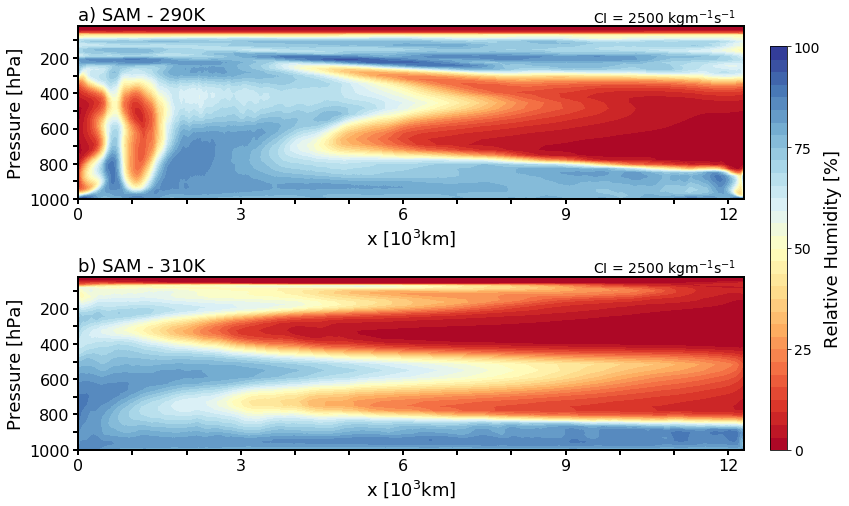

In [15]:
fig = plt.figure( figsize = (12, 7) )
plt.subplots_adjust(left = 0.1, right = 0.98, bottom = 0.11, top = 0.95, hspace = 0.45, wspace = 0.3)

ax = plt.subplot(2, 1, 1)
plt.title( "a) SAM - 290K", fontsize = 18, loc = "left" )

v = np.linspace( 0., 100., 33 )
plt.contourf( y, press , rh_c * 100., v, cmap = plt.cm.RdYlBu )

plt.ylim([1000., 20.])

plt.xlabel("x [10$^3$km]", fontsize = 18)
plt.ylabel("Pressure [hPa]", fontsize = 18)
a = 200
b = 2

sstream_c = streamfunction( u_c, press )
v = np.arange(2500., 32500, 2500 )
plt.contour( y, press, sstream_c, v, colors = 'k', alpha = 0.6 )

plt.text( 9.5, 0., "CI = 2500 kgm$^{-1}$s$^{-1}$", fontsize = 14 )

ax.tick_params(axis = 'x', which = 'both', bottom="on", top = "off", labelbottom = "on", direction = "out")
ax.tick_params(axis="y", which="both", bottom="off", top="off", labelbottom="off", left="on", right="off", labelleft="on", direction = "out") 
ax.tick_params(length = 5, which = 'both')

majorLocator = MultipleLocator(200)
minorLocator = MultipleLocator(100)
ax.yaxis.set_major_locator(majorLocator)
ax.yaxis.set_minor_locator(minorLocator)
majorLocator = MultipleLocator(3)
minorLocator = MultipleLocator(1)
ax.xaxis.set_major_locator(majorLocator)
ax.xaxis.set_minor_locator(minorLocator)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
ax.tick_params(which='both', width=2)


ax = plt.subplot(2, 1, 2)
plt.title( "b) SAM - 310K", fontsize = 18, loc = "left" )

v = np.linspace( 0., 100., 33 )
plt.contourf( y, press , rh_h * 100., v, cmap = plt.cm.RdYlBu )

plt.ylim([1000., 20.])

plt.xlabel("x [10$^3$km]", fontsize = 18)
plt.ylabel("Pressure [hPa]", fontsize = 18)
a = 200
b = 2

sstream_h = streamfunction( u_h, press )
v = np.arange(2500., 32500, 2500 )
plt.contour( y, press, sstream_h, v, colors = 'k', alpha = 0.6 )

plt.text( 9.5, 0., "CI = 2500 kgm$^{-1}$s$^{-1}$", fontsize = 14 )

ax.tick_params(axis = 'x', which = 'both', bottom="on", top = "off", labelbottom = "on", direction = "out")
ax.tick_params(axis="y", which="both", bottom="off", top="off", labelbottom="off", left="on", right="off", labelleft="on", direction = "out") 
ax.tick_params(length = 5, which = 'both')

majorLocator = MultipleLocator(200)
minorLocator = MultipleLocator(100)
ax.yaxis.set_major_locator(majorLocator)
ax.yaxis.set_minor_locator(minorLocator)
majorLocator = MultipleLocator(3)
minorLocator = MultipleLocator(1)
ax.xaxis.set_major_locator(majorLocator)
ax.xaxis.set_minor_locator(minorLocator)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
ax.tick_params(which='both', width=2)


fig.subplots_adjust(right = 0.87)
cbar_ax = fig.add_axes([0.9, 0.11, 0.02, 0.8])
cb = fig.colorbar(cset, cax=cbar_ax, ticks = [0., 25., 50., 75., 100.])
cb.set_label( "Relative Humidity [%]", fontsize = 18  )
cb.ax.tick_params(labelsize=14)
            

plt.savefig("SAM_290_310_comp.png")
plt.savefig("SAM_290_310_comp.pdf")

### Now compare with El Nino/La Nina simulations and +2K simulations

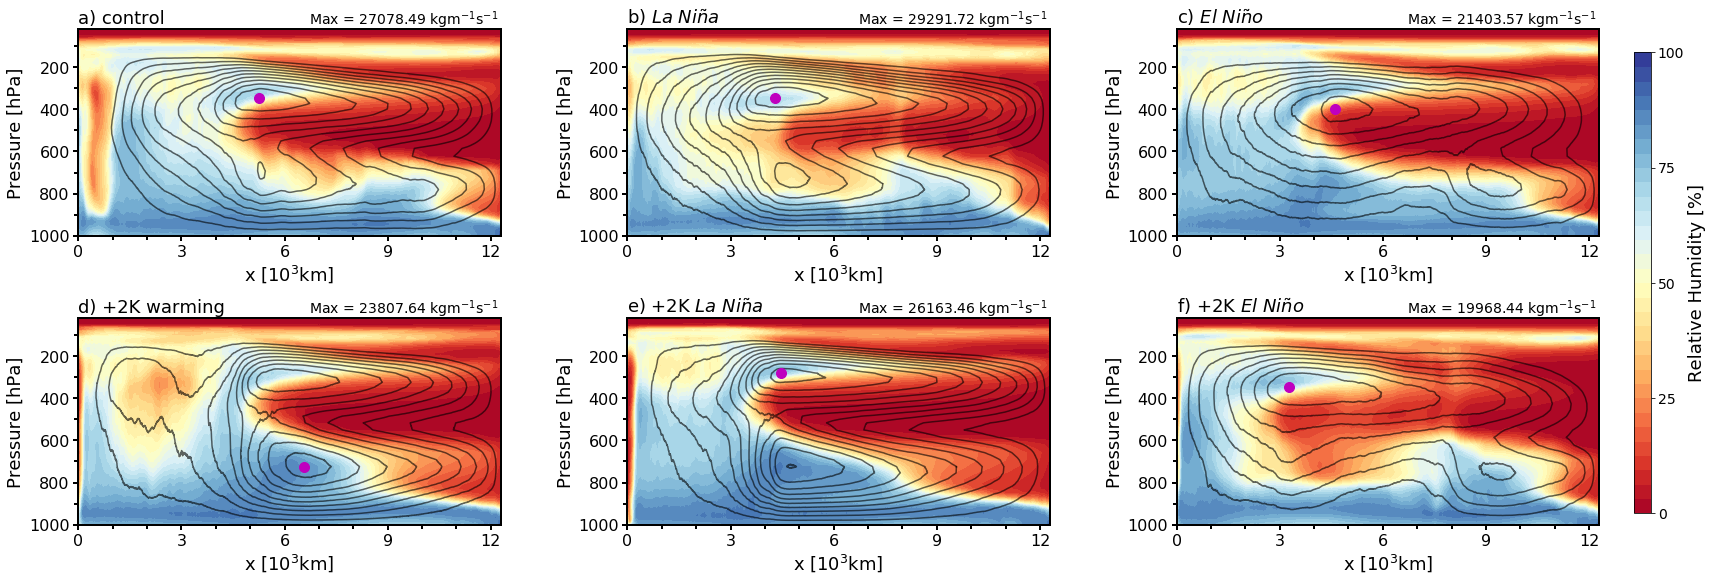

In [16]:
sf = ["3D_channel_300K", "3D_channel_LaNinaK", "3D_channel_ElNinoK",
      "3D_channel_+2KK", "3D_channel_+2K_ELK", "3D_channel_+2K_LNK" ]
s = len( sf )

titles = ["a) control", "b) $La$ $Ni\~na$", "c) $El$ $Ni\~no$", "d) +2K warming", "e) +2K $La$ $Ni\~na$", "f) +2K $El$ $Ni\~no$"]

fig = plt.figure( figsize = (24, 8) )
plt.subplots_adjust(left = 0.05, right = 0.99, bottom = 0.09, top = 0.95, hspace = 0.4, wspace = 0.3)

for i in range( s ):

    ax = plt.subplot(2, 3, i + 1 )
    plt.title( titles[i], fontsize = 18, loc = 'left' )

    u = np.load( "data/" + sf[i] + "_U.dat" )
    relh = np.load( "data/" + sf[i] + "_relh.dat" ) * 100.

    d1, d2 = np.shape( u )
    y = np.linspace( 0, d2 * 3 / 1000., d2 )

    v = np.linspace( 0., 100., 33 )
    cset = plt.contourf( y, press , relh, v, cmap = plt.cm.RdYlBu )

    plt.ylim([1000., 20.])

    plt.xlabel("x [10$^3$km]", fontsize = 18)
    plt.ylabel("Pressure [hPa]", fontsize = 18)
    a = 200
    b = 2

    stream = streamfunction( u, press * 100. )
    v = np.arange(2500., 32500, 2500 )
    
    plt.contour( y, press, stream, v, colors = 'k', alpha = 0.6 )
    max_stream = np.max( stream )
    plt.text( 6.7, 0., "Max = %0.2f kgm$^{-1}$s$^{-1}$" % max_stream, fontsize = 14 )
    max_index = np.where( stream == max_stream )
    plt.plot( y[max_index[1]], press[max_index[0]], 'mo', markersize = 10, markeredgecolor = 'm' )

    ax.tick_params(axis = 'x', which = 'both', bottom="on", top = "off", labelbottom = "on", direction = "out")
    ax.tick_params(axis="y", which="both", bottom="off", top="off", labelbottom="off", left="on", right="off", labelleft="on", direction = "out") 
    ax.tick_params(length = 6, which = 'major')
    ax.tick_params(length = 4, which = 'minor')
    majorLocator = MultipleLocator(200)
    minorLocator = MultipleLocator(100)
    ax.yaxis.set_major_locator(majorLocator)
    ax.yaxis.set_minor_locator(minorLocator)
    majorLocator = MultipleLocator(3)
    minorLocator = MultipleLocator(1)
    ax.xaxis.set_major_locator(majorLocator)
    ax.xaxis.set_minor_locator(minorLocator)
    plt.xticks(fontsize = 16)
    plt.yticks(fontsize = 16)

    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(2)
    ax.tick_params(which='minor', width=4)
    ax.tick_params(which='major', length= 5)
    ax.tick_params(which='both', width=2)

fig.subplots_adjust(right = 0.93)
cbar_ax = fig.add_axes([0.95, 0.11, 0.01, 0.8])
cb = fig.colorbar(cset, cax=cbar_ax, ticks = [0., 25., 50., 75., 100.])
cb.set_label( "Relative Humidity [%]", fontsize = 18  )
cb.ax.tick_params(labelsize=14)

plt.savefig("3D_sims_rel_hum_flow.png" )
plt.savefig("3D_sims_rel_hum_flow.pdf" )


## Compare EP/WP in El Nino/La Nina simulations

In [17]:
#Load La Nina data
lna_w = np.load("data/3D_channel_LaNinaK_W.dat")
lna_t = np.load("data/3D_channel_LaNinaK_temp.dat")
lna_relh = np.load("data/3D_channel_LaNinaK_relh.dat")
lna_qv = np.load("data/3D_channel_LaNinaK_qv.dat")

In [18]:
#Load El Nino data
lno_w = np.load("data/3D_channel_ElNinoK_W.dat")
lno_t = np.load("data/3D_channel_ElNinoK_temp.dat")
lno_relh = np.load("data/3D_channel_ElNinoK_relh.dat")
lno_qv = np.load("data/3D_channel_ElNinoK_qv.dat")

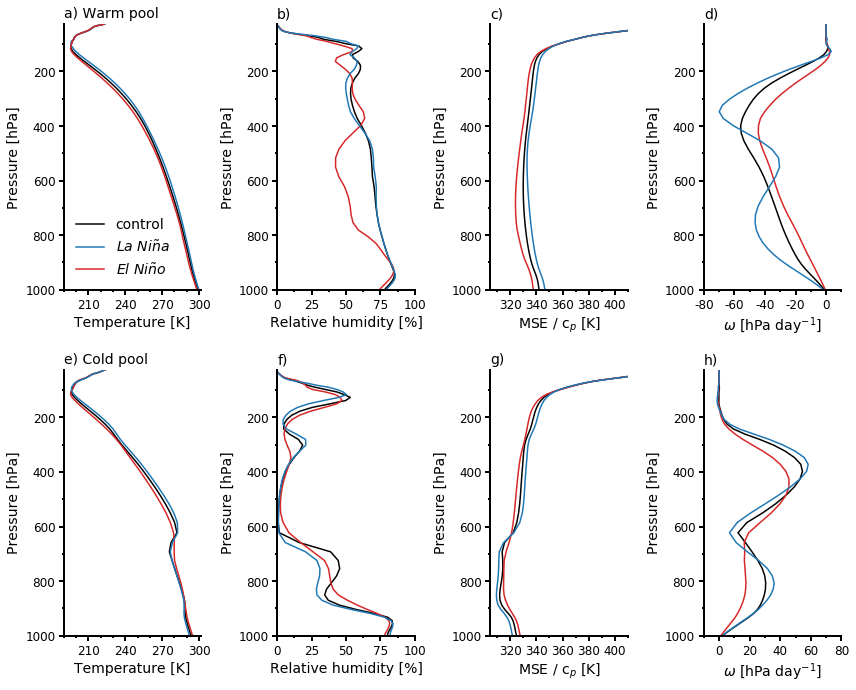

In [19]:
relh = np.load( "data/" + sf[0] + "_relh.dat" ) * 100.

cs = [(31 / 255., 119 / 255., 180 / 255.), (44. / 255., 160 / 255., 44 / 255.), (214 / 255., 39 / 255., 40 / 255.), (255 / 255., 127 / 255., 14 / 255.) ]

fig = plt.figure( figsize = (12, 10) )
plt.subplots_adjust(left = 0.08, right = 0.98, bottom = 0.1, top = 0.95, hspace = 0.3, wspace = 0.55)

ax = plt.subplot(2, 4, 1)
plt.title("a) Warm pool", loc = 'left', fontsize = 14)

plt.plot( np.mean(t[:, j1:j2], axis = 1), press, color = 'k')
plt.plot( np.mean(lno_t[:, j5:j6], axis = 1), press, color = cs[0])
plt.plot( np.mean(lna_t[:, j1:j2], axis = 1), press, color = cs[2])

plt.legend(["control", "$La$ $Ni\~na$", "$El$ $Ni\~no$"], frameon= False, fontsize = 14, loc = "lower left")

xticks(ax, 30., 10., "Temperature [K]", 190., 302.)
make_axis( ax )

ax = plt.subplot(2, 4, 5)
plt.title("e) Cold pool", loc = 'left', fontsize = 14)

plt.plot( np.mean(t[:, j3:j4], axis = 1), press, 'k')
plt.plot( np.mean(lna_t[:, j3:j4], axis = 1), press, color = cs[2])
plt.plot( np.mean(lno_t[:, j3:j4], axis = 1), press, color = cs[0])

xticks(ax, 30., 10., "Temperature [K]", 190., 302.)
make_axis( ax )

ax = plt.subplot(2, 4, 2)
plt.title("b)", loc = 'left', fontsize = 14)
plt.plot( np.mean(relh[:, j1:j2], axis = 1), press, 'k')
plt.plot( np.mean(lna_relh[:, j5:j6] * 100., axis = 1), press, color = cs[2])
plt.plot( np.mean(lno_relh[:, j1:j2] * 100., axis = 1), press, color = cs[0])

xticks(ax, 25., 12.5, "Relative humidity [%]", 0., 100.)
make_axis( ax )

ax = plt.subplot(2, 4, 6)
plt.title("f)", loc = 'left', fontsize = 14)

plt.plot( np.mean(relh[:, j3:j4], axis = 1), press, 'k')
plt.plot( np.mean(lna_relh[:, j3:j4] * 100., axis = 1), press, color = cs[2])
plt.plot( np.mean(lno_relh[:, j3:j4] * 100., axis = 1), press, color = cs[0])


xticks(ax, 25., 12.5, "Relative humidity [%]", 0., 100.)
make_axis( ax )

ax = plt.subplot(2, 4, 3)
plt.title("c)", loc = 'left', fontsize = 14)

cp = 1005.
mse = qv * Lv + cp * t + 9.8 * z[:, np.newaxis]
lna_mse = lna_qv * Lv + cp * lna_t + 9.8 * z[:, np.newaxis]
lno_mse = lno_qv * Lv + cp * lno_t + 9.8 * z[:, np.newaxis]

plt.plot( np.mean(mse[:, j1:j2], axis = 1) / 1005., press, 'k')
plt.plot( np.mean(lna_mse[:, j1:j2], axis = 1) / 1005., press, color = cs[2])
plt.plot( np.mean(lno_mse[:, j5:j6], axis = 1) / 1005., press, color = cs[0])

xticks(ax, 20., 10, "MSE / c$_p$ [K]", 305., 410.)

make_axis( ax )


ax = plt.subplot(2, 4, 7)
plt.title("g)", loc = 'left', fontsize = 14)

plt.plot( np.mean(mse[:, j3:j4], axis = 1) / 1005., press, 'k')
plt.plot( np.mean(lna_mse[:, j3:j4], axis = 1) / 1005., press, color = cs[2])
plt.plot( np.mean(lno_mse[:, j3:j4], axis = 1) / 1005., press, color = cs[0])

xticks(ax, 20., 10, "MSE / c$_p$ [K]", 305., 410.)

make_axis( ax )


ax = plt.subplot(2, 4, 4)
plt.title("d)", loc = 'left', fontsize = 14)

plt.plot( np.mean(w[:, j1:j2], axis = 1) * -9.8 * rho / 100. * 86400., press, 'k')
plt.plot( np.mean(lna_w[:, j1:j2], axis = 1) * -9.8 * rho / 100. * 86400., press, color = cs[2])
plt.plot( np.mean(lno_w[:, j5:j6], axis = 1) * -9.8 * rho / 100. * 86400., press, color = cs[0])


xticks(ax, 20., 10, "$\omega$ [hPa day$^{-1}$]", -80., 10.)
make_axis( ax )

ax = plt.subplot(2, 4, 8)
plt.title("h)", loc = 'left', fontsize = 14)

plt.plot( np.mean(w[:, j3:j4], axis = 1) * -9.8 * rho / 100. * 86400., press, 'k')
plt.plot( np.mean(lna_w[:, j3:j4], axis = 1) * -9.8 * rho / 100. * 86400., press, color = cs[2])
plt.plot( np.mean(lno_w[:, j3:j4], axis = 1) * -9.8 * rho / 100. * 86400., press, color = cs[0])

xticks(ax, 20., 10, "$\omega$ [hPa day$^{-1}$]", -10., 80.)
make_axis( ax )

plt.savefig("ENSO_EP_WP_comp.png")
plt.savefig("ENSO_EP_WP_comp.pdf")

## Compare responses in EP/WP in warming simulations


In [20]:
#Load +2K data
w2 = np.load("data/3D_channel_+2KK_W.dat")
t2 = np.load("data/3D_channel_+2KK_temp.dat")
relh2 = np.load("data/3D_channel_+2KK_relh.dat")
qv2 = np.load("data/3D_channel_+2KK_qv.dat")

In [21]:
#Load +2K La Nina data
lna_w2 = np.load("data/3D_channel_+2K_LNK_W.dat")
lna_t2 = np.load("data/3D_channel_+2K_LNK_temp.dat")
lna_relh2 = np.load("data/3D_channel_+2K_LNK_relh.dat")
lna_qv2 = np.load("data/3D_channel_+2K_LNK_qv.dat")

In [22]:
#Load +2K El Nino data
lno_w2 = np.load("data/3D_channel_+2K_ELK_W.dat")
lno_t2 = np.load("data/3D_channel_+2K_ELK_temp.dat")
lno_relh2 = np.load("data/3D_channel_+2K_ELK_relh.dat")
lno_qv2 = np.load("data/3D_channel_+2K_ELK_qv.dat")

In [23]:
def make_axis2( a):
    majorLocator = MultipleLocator( 200 )
    majorFormatter = FormatStrFormatter('%d')
    minorLocator = MultipleLocator( 100 )

    a.yaxis.set_major_locator(majorLocator)
    a.yaxis.set_major_formatter(majorFormatter)
    a.yaxis.set_minor_locator(minorLocator)
    
    plt.yticks(fontsize = 14)
    plt.ylabel("Pressure [hPa]", fontsize = 16)
    
    plt.ylim([1000., 25.])
    
    a.spines['right'].set_visible(False)
    a.spines['top'].set_visible(False)
    
    for axis in ['top','bottom','left','right']:
        a.spines[axis].set_linewidth(2)
    a.tick_params(which='minor', width=4)
    a.tick_params(which='major', length= 5)
    a.tick_params(which='both', width=2)
    
    return 0

def xticks2(a, major, minor, label, xl1, xl2):
    majorLocator = MultipleLocator( major )
    majorFormatter = FormatStrFormatter('%d')
    minorLocator = MultipleLocator( minor )

    a.xaxis.set_major_locator(majorLocator)
    a.xaxis.set_major_formatter(majorFormatter)
    a.xaxis.set_minor_locator(minorLocator)
    
    plt.xticks(fontsize = 14)
    plt.xlabel(label, fontsize = 16) 
    
    plt.xlim([xl1, xl2])
    
    return 0

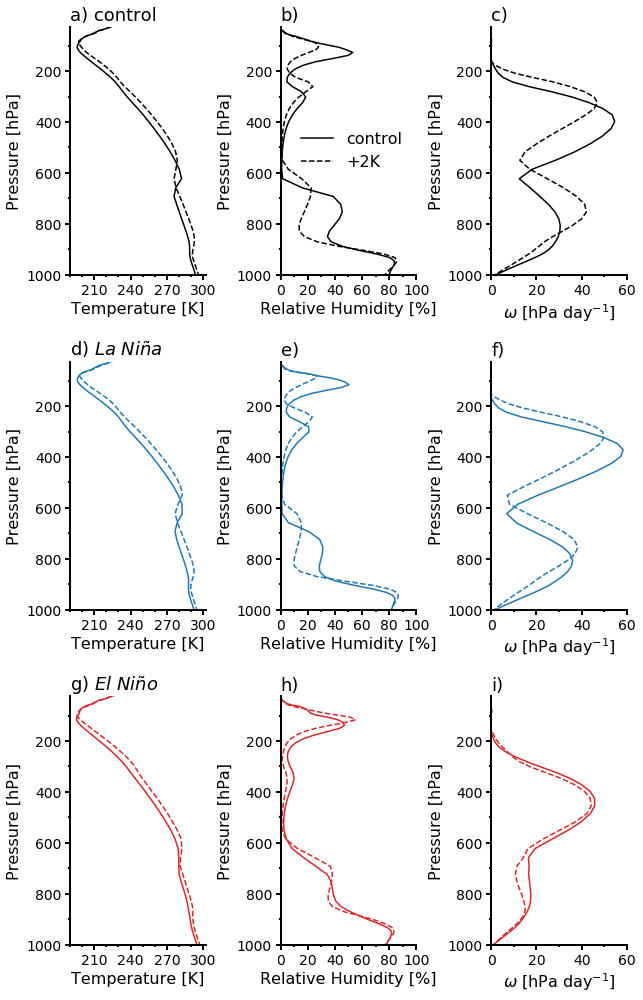

In [24]:
#Just plot EP response - WP is ~ moist adiabatic

cs = [(31 / 255., 119 / 255., 180 / 255.), (44. / 255., 160 / 255., 44 / 255.), (214 / 255., 39 / 255., 40 / 255.), (255 / 255., 127 / 255., 14 / 255.) ]

fig = plt.figure( figsize = (9, 15) )
plt.subplots_adjust(left = 0.12, right = 0.98, bottom = 0.1, top = 0.95, hspace = 0.35, wspace = 0.55)


titles = ["a) control", "d) $La$ $Ni\~na$", "g) $El$ $Ni\~no$"]
for i in range( 3 ):
    ax = plt.subplot(3, 3, 1 + 3 * i)
    plt.title(titles[i], loc = 'left', fontsize = 18)
    if i == 0:
        plt.plot( np.mean(t[:, j3:j4], axis = 1), press, 'k')
        plt.plot( np.mean(t2[:, j3:j4], axis = 1), press, 'k--')
    elif i == 2:
        plt.plot( np.mean(lna_t[:, j3:j4], axis = 1), press, color = cs[2])
        plt.plot( np.mean(lna_t2[:, j3:j4], axis = 1), press, '--', color = cs[2])
    else:
        plt.plot( np.mean(lno_t[:, j3:j4], axis = 1), press, color = cs[0])
        plt.plot( np.mean(lno_t2[:, j3:j4], axis = 1), press, '--', color = cs[0])
    
    xticks2(ax, 30., 10., "Temperature [K]", 190., 302.)
    make_axis2( ax )

titles = ["b)", "e)", "h)"]
for i in range( 3 ):
    ax = plt.subplot(3, 3, 2 + 3 * i)
    plt.title(titles[i], loc = 'left', fontsize = 18)
    if i == 0:
        plt.plot( np.mean(relh[:, j3:j4], axis = 1), press, 'k')
        plt.plot( np.mean(relh2[:, j3:j4] * 100., axis = 1), press, 'k--')
    elif i == 2:
        plt.plot( np.mean(lna_relh[:, j3:j4] * 100., axis = 1), press, color = cs[2])
        plt.plot( np.mean(lna_relh2[:, j3:j4] * 100., axis = 1), press, '--', color = cs[2])
    else:
        plt.plot( np.mean(lno_relh[:, j3:j4] * 100., axis = 1), press, color = cs[0])
        plt.plot( np.mean(lno_relh2[:, j3:j4] * 100., axis = 1), press, '--', color = cs[0])
    xticks2(ax, 20., 10., "Relative Humidity [%]", 0., 100.)
    make_axis2( ax )
    if i == 0:
        plt.legend(["control", "+2K"], frameon = False, loc = "center right", fontsize = 16)

titles = ["c)", "f)", "i)"]
for i in range( 3 ):
    ax = plt.subplot(3, 3, 3 + 3 * i)
    plt.title(titles[i], loc = 'left', fontsize = 18)

    if i == 0:
        plt.plot( np.mean(w[:, j3:j4], axis = 1) * -9.8 * rho / 100. * 86400., press, 'k')
        plt.plot( np.mean(w2[:, j3:j4], axis = 1) * -9.8 * rho / 100. * 86400., press, 'k--')
    elif i == 2:
        plt.plot( np.mean(lna_w[:, j3:j4], axis = 1) * -9.8 * rho / 100. * 86400., press, '-', color = cs[2])
        plt.plot( np.mean(lna_w2[:, j3:j4], axis = 1) * -9.8 * rho / 100. * 86400., press, '--', color = cs[2])
    else:
        plt.plot( np.mean(lno_w[:, j3:j4], axis = 1) * -9.8 * rho / 100. * 86400., press, '-', color = cs[0])
        plt.plot( np.mean(lno_w2[:, j3:j4], axis = 1) * -9.8 * rho / 100. * 86400., press, '--', color = cs[0])

    xticks2(ax, 20., 10, "$\omega$ [hPa day$^{-1}$]", 0., 60.)
    make_axis2( ax )


plt.savefig("response_EP_WP_comp.png")
plt.savefig("response_EP_WP_comp.pdf")
